## 릿지 회귀

In [1]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
# boston 데이터셋 로드
boston = load_boston()

# 로드한 데이터셋 데이터 프레임으로 변환
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

# boston dataset의 target array는 주택 가격이다. 이를 PRICE컬럼으로 데이터 프레임에 추가
bostonDF['PRICE'] = boston.target
print("Boston 데이터셋 크기",bostonDF.shape)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores: ', np.round(rmse_scores, 3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

Boston 데이터셋 크기 (506, 14)
 5 folds 의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores:  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE : 5.518 


In [3]:
# alpha 값을 0, 0.1, 1, 10, 100으로 변경하면서 RMSE 측정

# Ridge에 사용될 alphas list값을 iteration 하면서 alpha에 따른 평균 rmse 구함.
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    # cross_val_score를 이용하여 5fold의 평균 RMSE계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha, avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 5.829 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788 
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653 
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518 
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330 


IndexError: index 5 is out of bounds for axis 0 with size 5

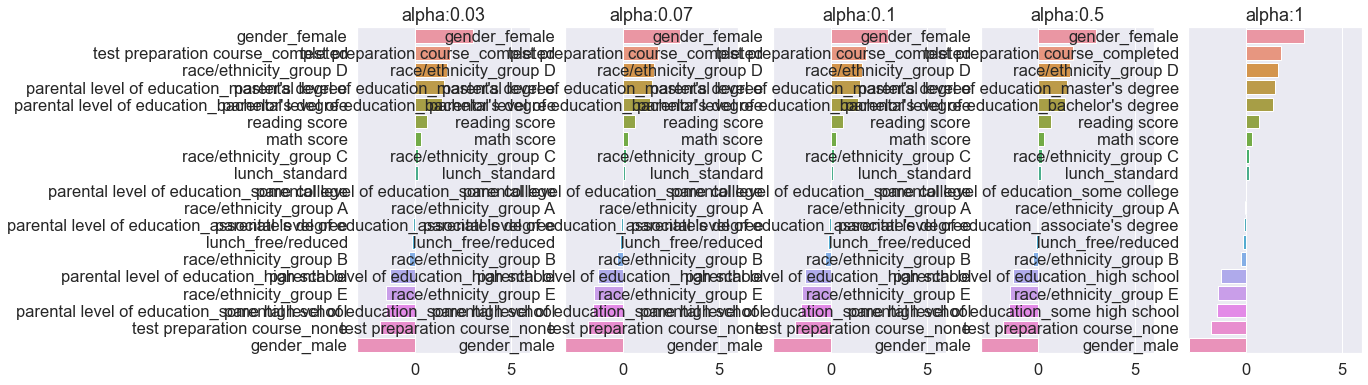

In [130]:
# 각 alpha에 따른 회귀 계수 값을 시각화. 각 alpha값 별로 plt.subplots로 맷플롯립 축 생성

fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alpha 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장, pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 데이터프레임의 컬럼으로 추가
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    
    #막대 그래프로 각 alpha값에서의 회귀 계수를 시각화, 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
# for 문 바깥에서 맷플롯립의 show호출 및 alpha에 따른 피처별 회귀 계수를 데이터프레임으로 표시
plt.show()

In [5]:
# alpha값에 따른 컴럼별 회귀계수 출력
ridge_alphas = [0,  0.1, 1, 10, 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


### 라쏘, 엘라스틱넷은 직접 해보기
- 함수 구현
- 라쏘 실습
- 엘라스틱넷 실습

#### 함수 구현

In [6]:
from sklearn.linear_model import Lasso, ElasticNet
# 함수구현
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose :
        print('###### ', model_name, '######')
    for param in params:
        if model_name == 'Ridge':
            model = Ridge(alpha=param)
        elif model_name == 'Lasso':
            model = Lasso(alpha=param)
        elif model_name == 'ElasticNet':
            model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring="neg_mean_squared_error", cv=5)    
        rmse_scores = np.sqrt(-1*neg_mse_scores)
        avg_rmse = np.mean(rmse_scores)
        
        print('alpha {0} 일 때 5 폴드 세트의 개별 Negative MSE scores: {1}'.format(param, np.round(neg_mse_scores, 3)))
        print('alpha {0} 일 때 5 폴드 세트의 개별 RMSE scores: {1}'.format(param, np.round(rmse_scores, 3)))
        print('alpha {0} 일 때 5 폴드 세트의 평균 RMSE : {1:.3f}\n'.format(param, avg_rmse))
        
        model.fit(X_data_n, y_target_n)
        if return_coeff:
            coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff
    return coeff_df

#### 라쏘 실습

In [7]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

######  Lasso ######
alpha 0.07 일 때 5 폴드 세트의 개별 Negative MSE scores: [-11.169 -24.38  -28.537 -80.49  -29.9  ]
alpha 0.07 일 때 5 폴드 세트의 개별 RMSE scores: [3.342 4.938 5.342 8.972 5.468]
alpha 0.07 일 때 5 폴드 세트의 평균 RMSE : 5.612

alpha 0.1 일 때 5 폴드 세트의 개별 Negative MSE scores: [-11.222 -24.345 -29.426 -79.367 -29.792]
alpha 0.1 일 때 5 폴드 세트의 개별 RMSE scores: [3.35  4.934 5.425 8.909 5.458]
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE : 5.615

alpha 0.5 일 때 5 폴드 세트의 개별 Negative MSE scores: [-12.466 -27.592 -42.25  -67.198 -23.664]
alpha 0.5 일 때 5 폴드 세트의 개별 RMSE scores: [3.531 5.253 6.5   8.197 4.865]
alpha 0.5 일 때 5 폴드 세트의 평균 RMSE : 5.669

alpha 1 일 때 5 폴드 세트의 개별 Negative MSE scores: [-15.141 -33.333 -53.293 -56.604 -19.287]
alpha 1 일 때 5 폴드 세트의 개별 RMSE scores: [3.891 5.773 7.3   7.524 4.392]
alpha 1 일 때 5 폴드 세트의 평균 RMSE : 5.776

alpha 3 일 때 5 폴드 세트의 개별 Negative MSE scores: [-22.751 -36.892 -71.6   -52.544 -19.27 ]
alpha 3 일 때 5 폴드 세트의 개별 RMSE scores: [4.77  6.074 8.462 7.249 4.39 ]
alpha 3 일 때 5 폴드 세트의 평균 RM

In [8]:
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


#### 엘라스틱넷 실습

In [9]:
elastic_alpha = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alpha, X_data_n=X_data, y_target_n=y_target)

######  ElasticNet ######
alpha 0.07 일 때 5 폴드 세트의 개별 Negative MSE scores: [-11.397 -24.608 -29.    -74.978 -28.382]
alpha 0.07 일 때 5 폴드 세트의 개별 RMSE scores: [3.376 4.961 5.385 8.659 5.327]
alpha 0.07 일 때 5 폴드 세트의 평균 RMSE : 5.542

alpha 0.1 일 때 5 폴드 세트의 개별 Negative MSE scores: [-11.504 -24.773 -29.998 -72.646 -27.671]
alpha 0.1 일 때 5 폴드 세트의 개별 RMSE scores: [3.392 4.977 5.477 8.523 5.26 ]
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE : 5.526

alpha 0.5 일 때 5 폴드 세트의 개별 Negative MSE scores: [-13.143 -28.191 -40.673 -54.664 -21.417]
alpha 0.5 일 때 5 폴드 세트의 개별 RMSE scores: [3.625 5.309 6.378 7.394 4.628]
alpha 0.5 일 때 5 폴드 세트의 평균 RMSE : 5.467

alpha 1 일 때 5 폴드 세트의 개별 Negative MSE scores: [-14.915 -31.213 -50.882 -49.165 -19.277]
alpha 1 일 때 5 폴드 세트의 개별 RMSE scores: [3.862 5.587 7.133 7.012 4.391]
alpha 1 일 때 5 폴드 세트의 평균 RMSE : 5.597

alpha 3 일 때 5 폴드 세트의 개별 Negative MSE scores: [-21.212 -35.603 -68.374 -50.854 -19.08 ]
alpha 3 일 때 5 폴드 세트의 개별 RMSE scores: [4.606 5.967 8.269 7.131 4.368]
alpha 3 일 때 5 폴드 세트의 

In [10]:
sort_column = 'alpha:'+str(elastic_alpha[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


## 시계열(Time series)

In [11]:
from fbprophet import Prophet
import numpy as np
import pandas as pd
df = pd.read_csv('./data/archive/avocado.csv')


Importing plotly failed. Interactive plots will not work.


In [12]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [14]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [15]:
df.groupby('type').mean()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
type,,,,,,,,,,,
conventional,24.236686,1.158040,1.653213e+06,578611.649925,574805.318859,45405.796798,454390.130901,346721.795885,101457.698855,6210.635065,2016.147929
organic,24.227776,1.653999,4.781121e+04,7311.281600,15411.857724,266.254582,24817.654696,17613.474543,7202.982659,1.197164,2016.147868


In [16]:
df[df['region'] == 'TotalUS'].groupby('type').mean()[['Unnamed: 0','AveragePrice', 'Total Volume']]

,Unnamed: 0,AveragePrice,Total Volume
type,,,
conventional,24.236686,1.092012,3.373504e+07
organic,24.236686,1.546036,9.675657e+05


In [17]:
df[df['region'] == 'TotalUS'].groupby('type')[['Date','AveragePrice']]

In [18]:

df = df.loc[(df.type == 'conventional') & (df.region == 'TotalUS')]
df['Date'] = pd.to_datetime(df['Date'])
data = pd.DataFrame()
data['ds'] = df['Date'].reset_index(drop=True)
data['y'] = df['AveragePrice'].reset_index(drop=True)
data.head()

C:\Users\minch\anaconda3\envs\abangues\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ds,y
0,2015-12-27,0.95
1,2015-12-20,0.98
2,2015-12-13,0.93
3,2015-12-06,0.89
4,2015-11-29,0.99


<AxesSubplot:xlabel='ds'>

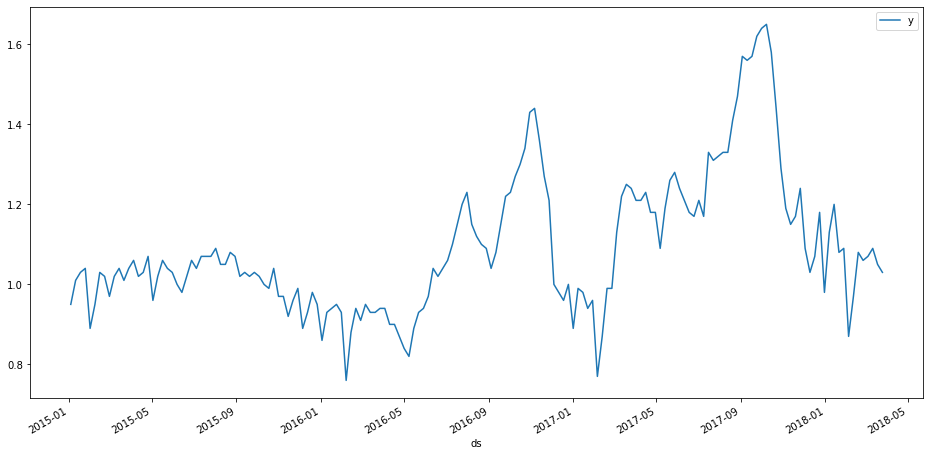

In [19]:
data.plot(x='ds', y='y', figsize=(16,8))

In [20]:
model = Prophet()
model.fit(data)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
forecast.tail()

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
529,2019-03-21,1.171972,0.978827,1.242593,1.108273,1.238893,-0.059338,-0.059338,-0.059338,-0.059338,-0.059338,-0.059338,0.0,0.0,0.0,1.112634
530,2019-03-22,1.171861,0.975031,1.241148,1.107943,1.239085,-0.057928,-0.057928,-0.057928,-0.057928,-0.057928,-0.057928,0.0,0.0,0.0,1.113933
531,2019-03-23,1.171750,0.981440,1.249088,1.107614,1.239276,-0.056045,-0.056045,-0.056045,-0.056045,-0.056045,-0.056045,0.0,0.0,0.0,1.115706
532,2019-03-24,1.171640,0.993012,1.239759,1.107284,1.239450,-0.053704,-0.053704,-0.053704,-0.053704,-0.053704,-0.053704,0.0,0.0,0.0,1.117936
533,2019-03-25,1.171529,0.992914,1.244153,1.106949,1.239618,-0.050936,-0.050936,-0.050936,-0.050936,-0.050936,-0.050936,0.0,0.0,0.0,1.120593


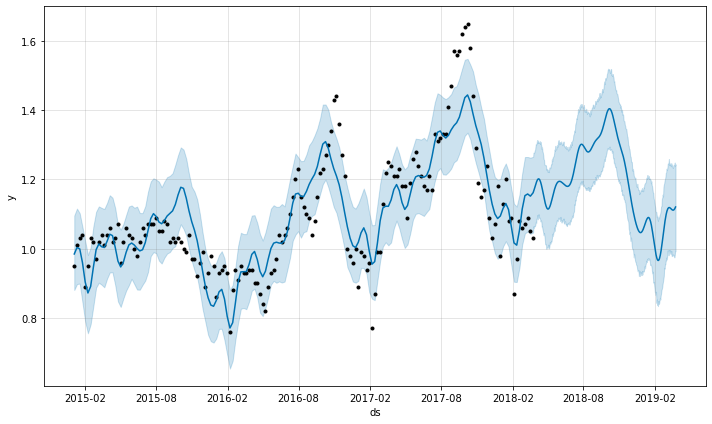

In [21]:
flg1 = model.plot(forecast)

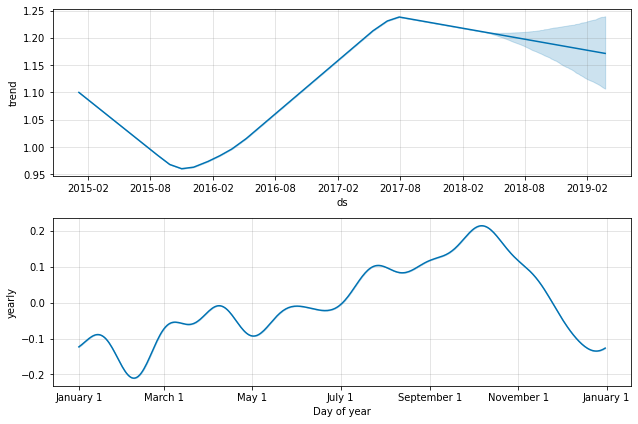

In [22]:
flg2 = model.plot_components(forecast)
# trand 트랜드 예상
# yearly 연간 가격변동

## StudentsPerformance분석

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
sns.set(style="darkgrid", palette="bright", font_scale=1.5)
file_name = 'StudentsPerformance'
df = pd.read_csv('./data/'+file_name+'.csv')
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [24]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


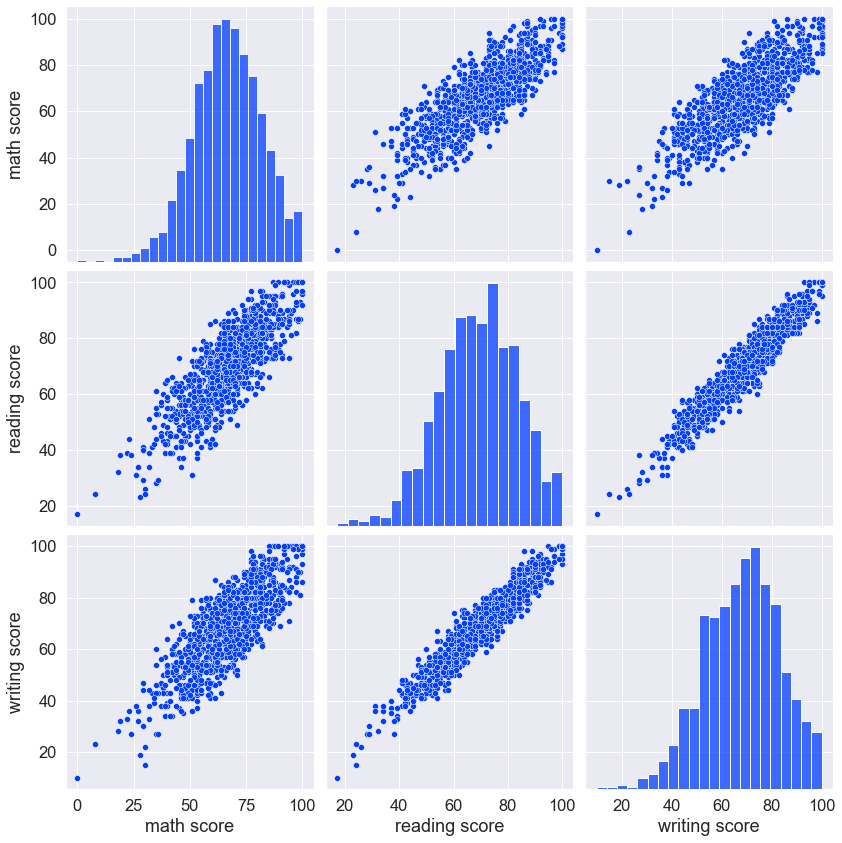

In [25]:
sns.pairplot(df[['math score', 'reading score', 'writing score']], height=4)

In [26]:
def average_score(df):
    return (df['math score'] + df['reading score'] + df['writing score'])/3
df['average score'] = df.apply(average_score, axis=1)

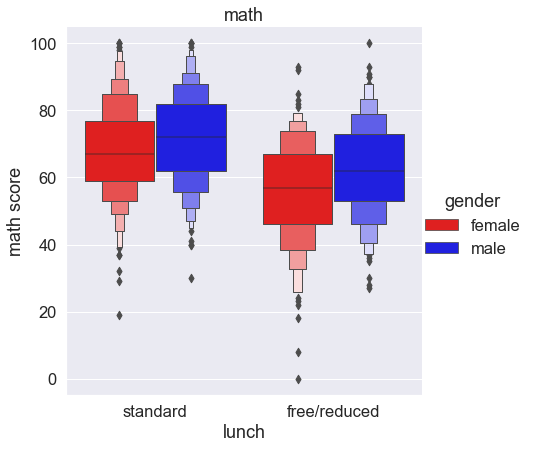

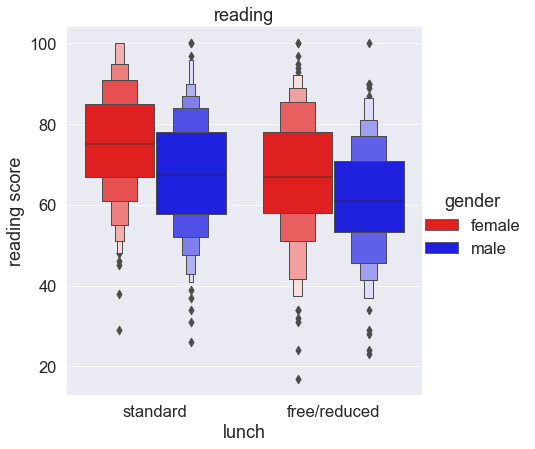

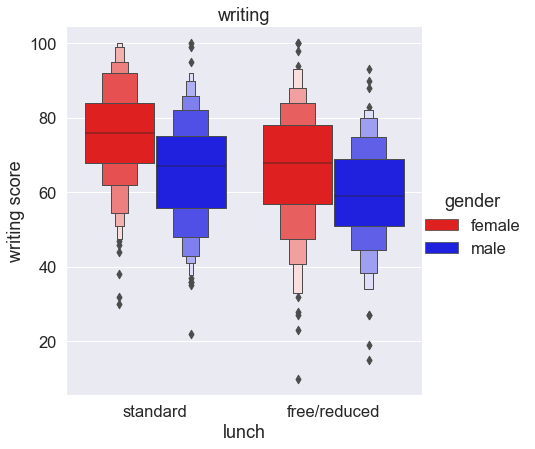

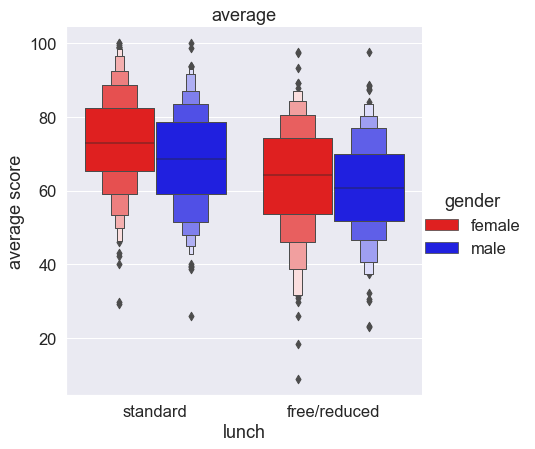

In [27]:
scores = ['math score', 'reading score', 'writing score', 'average score']
for score in scores:
    sns.catplot(x='lunch', y=score, hue='gender', kind='boxen', data=df, height=6,
                palette=sns.color_palette(['red', 'blue']))
    plt.title(score.split()[0])

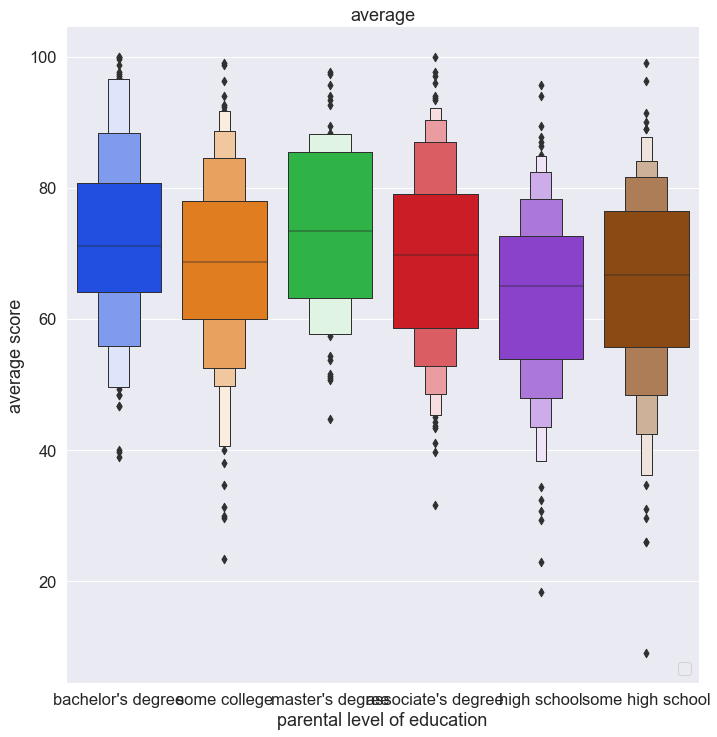

In [28]:
sns.catplot(x='parental level of education', y='average score', kind='boxen', data=df, height=10)
plt.title('average')
plt.legend(loc='lower right')

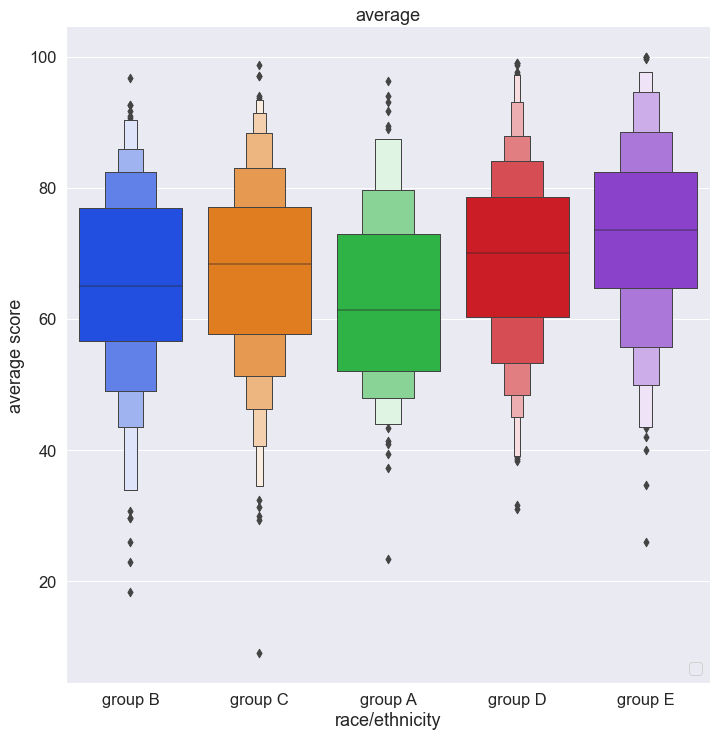

In [29]:
sns.catplot(x='race/ethnicity', y='average score', kind='boxen', data=df, height=10)
plt.title('average')
plt.legend(loc='lower right')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   average score                1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB
